In [117]:
import glob                 #To get files from folder
import pandas as pd         #To read those files
import numpy as np          #To do mathematical operation
import os                   #Files manupulation 

from sklearn.naive_bayes import MultinomialNB                       #Model import from sklearn
from sklearn.feature_extraction.text import CountVectorizer          
from sklearn.model_selection import train_test_split                 
from sklearn.metrics import accuracy_score                           #How the classifire works/ How accruate it is!
import time                                                          #How much time it take to run
import re                                                            #Replacement
from sklearn.pipeline import Pipeline                                
from sklearn.feature_extraction.text import TfidfTransformer         
from sklearn.metrics import confusion_matrix                         #Model description with color 
import joblib                                                        


In [118]:
all_file = glob.glob("../songData/*.xlsx")
len(all_file)

21

In [119]:
all_file

g = all_file[2]
g.split('\\')[1][:-5]

'songType10'

In [120]:
names = []
count = []
clusters = []
data = []

for each in all_file:
    temp = pd.read_excel(each,engine='openpyxl')
    
    
    count.append(len(temp))
    names.append(each.split('/')[1][:-5])
    clusters.append(temp['songType'])
    
    
    data.append(temp)
    
cluster_ids =clusters    

In [121]:
data = pd.concat(data)
data = data.sample(frac =1)

data

,Unnamed: 0,lyrics,songType
220,1632,বসন্তপ্রভাতে এক মালতীর ফুল প্রথম মেলিল আঁখি তা...,17
674,3635,এ পথ যদি না শেষ হয় তবে কেমন হতো তুমি বলোতো যদি...,3
685,3979,"কবিতা, তুমি স্বপ্নচারিনী হয়ে খবর নিও না কবিতা,...",13
114,567,"কোথায় হারালি তুই, কিছু না বলে আমাকে? কোথায় হার...",1
693,3182,মাঝে মাঝে তব দেখা পাই চিরদিন কেন পাই না? কেন ম...,17
...,...,...,...
56,956,ভোরের হাওয়ায় এলে ঘুম ভাঙ্গাতে কি চুম হেনে নয়নপ...,7
165,3326,আমি যদি আরব হতাম মদিনারই পথ। এই পথে মোর চলে যে...,7
874,3671,তুমি একজনই শুধু বন্ধু আমার শত্রুও তুমি একজন তা...,1
1024,4101,"পাড়ায় ঢুকলে ঠ্যাং খোঁড়া করে দেব, বলেছে পাড়ার দ...",1


In [122]:
data['lyrics']

220     বসন্তপ্রভাতে এক মালতীর ফুল প্রথম মেলিল আঁখি তা...
674     এ পথ যদি না শেষ হয় তবে কেমন হতো তুমি বলোতো যদি...
685     কবিতা, তুমি স্বপ্নচারিনী হয়ে খবর নিও না কবিতা,...
114     কোথায় হারালি তুই, কিছু না বলে আমাকে? কোথায় হার...
693     মাঝে মাঝে তব দেখা পাই চিরদিন কেন পাই না? কেন ম...
                              ...                        
56      ভোরের হাওয়ায় এলে ঘুম ভাঙ্গাতে কি চুম হেনে নয়নপ...
165     আমি যদি আরব হতাম মদিনারই পথ। এই পথে মোর চলে যে...
874     তুমি একজনই শুধু বন্ধু আমার শত্রুও তুমি একজন তা...
1024    পাড়ায় ঢুকলে ঠ্যাং খোঁড়া করে দেব, বলেছে পাড়ার দ...
3       আজ তোমায় স্বপ্ন দেখাবো না কল্পনায় তোমায় ভাসাবো...
Name: lyrics, Length: 4105, dtype: object

In [123]:
stopwords = ['হাই', 'ফ্রিকুয়েন্সি', 'কিন্তু', 'অপ্রয়োজনীয়', 'শব্দ', 'অবশ্য',
'অনেক',
'অনেকে',
'অনেকেই',
'অন্তত',
'অথবা',
'অথচ',
'অর্থাত',
'অন্য',
'আজ',
'আছে',
'আপনার',
'আপনি',
'আবার',
'আমরা',
'আমাকে',
'আমাদের',
'আমার',
'আমি',
'আরও',
'আর',
'আগে',
'আগেই',
'আই',
'অতএব',
'আগামী',
'অবধি',
'অনুযায়ী',
'আদ্যভাগে',
'এই',
'একই',
'একে',
'একটি',
'এখন',
'এখনও',
'এখানে',
'এখানেই',
'এটি',
'এটা',
'এটাই',
'এতটাই',
'এবং',
'একবার',
'এবার',
'এদের',
'এঁদের',
'এমন',
'এমনকী',
'এল',
'এর',
'এরা',
'এঁরা',
'এস',
'এত',
'এতে',
'এসে',
'একে',
'এ',
'ঐ',
 'ই',
'ইহা',
'ইত্যাদি',
'উনি',
'উপর',
'উপরে',
'উচিত',
'ও',
'ওই',
'ওর',
'ওরা',
'ওঁর',
'ওঁরা',
'ওকে',
'ওদের',
'ওঁদের',
'ওখানে',
'কত',
'কবে',
'করতে',
'কয়েক',
'কয়েকটি',
'করবে',
'করলেন',
'করার',
'কাছে',
'কাজে',
'কারণ',
'কিছু',
'কিছুই',
'কিন্তু',
'কিংবা',
'কি',
'কী',
'কেন',
'কে',
'কোনও',
'কোনো',
'ক্ষেত্রে',
'খুব',
'গুলি'
'গিয়ে',
'গোটা',
'চলে',
'ছাড়া',
'ছাড়াও',
'ছিলেন',
'ছিল',
'জন্য',
'জানা',
'ঠিক',
'তিনি',
'তিনঐ',
'তিনিও',
'তেমন',
'তাকে',
'তাহা',
'তাহাতে',
'তাহার',
'তাদের',
'তিনি',
'তা',
'তুমি',
'তোমার',
'তথা',
'না',
'পারে',
'ব্যবহার',
'বললেন',
'যখন',
'যদি',
'টি' ]


In [124]:
data['lyrics'] = data['lyrics'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords)]))

In [125]:
X_train, X_test, y_train, y_test =  train_test_split(data['lyrics'], data['songType'], test_size=0.33, random_state=42 )

In [126]:
X_train.shape

(2750,)

In [127]:
X_test.shape

(1355,)

In [128]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn import metrics

total_data_count = len(data)
per_class_counts = []
# unique_classes = np.unique(data['idx'].values)
unique_classes = np.unique(data['songType'].values)

class_count_mean = np.mean(count)

###########################3
############### classifier setup ################

from sklearn.linear_model import SGDClassifier
text_clf_svm = Pipeline([
    
    ('vect', CountVectorizer(stop_words=stopwords,
                            analyzer="word", 
                            lowercase=False,
                            token_pattern="[\S]*",
                            tokenizer=None,
                            ngram_range=(1, 3),
                            preprocessor=None)),                 
    ('tfidf', TfidfTransformer()),
    ('clf-svm', KNeighborsClassifier(n_neighbors=15)),
                                                                        
])
classifier = text_clf_svm.fit(list(X_train), list(y_train))


cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
score = cross_val_score(text_clf_svm, list(X_train), list(y_train), cv=cv)

print("Cross Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))


predicted = classifier.predict(X_test)

C:\Users\MANSTEIN\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens [''] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '
C:\Users\MANSTEIN\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens [''] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '
C:\Users\MANSTEIN\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens [''] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '
C:\Users\MANSTEIN\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with

Cross Accuracy: 0.18 (+/- 0.12)


In [129]:
print("Cross Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
print(metrics.classification_report(y_test, predicted))

Cross Accuracy: 0.18 (+/- 0.12)
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.27      0.60      0.38       331
           2       0.00      0.00      0.00         3
           3       0.50      0.05      0.09       265
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00        24
           6       0.50      0.13      0.21        31
           7       0.00      0.00      0.00        63
           8       0.00      0.00      0.00         4
           9       0.00      0.00      0.00        22
          10       0.00      0.00      0.00        12
          11       0.00      0.00      0.00        18
          12       0.03      0.53      0.06        30
          13       0.29      0.03      0.06       238
          14       0.00      0.00      0.00        20
          15       0.00      0.00      0.00         1
          16       0.00      0.00      0.00      

C:\Users\MANSTEIN\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [130]:
import pandas as pd
confusion_matrix = list(metrics.confusion_matrix(y_test, predicted))

print(len(confusion_matrix), len(confusion_matrix[0]))
print(len(names), len(names[0]))

21 21
21 18


<AxesSubplot:>

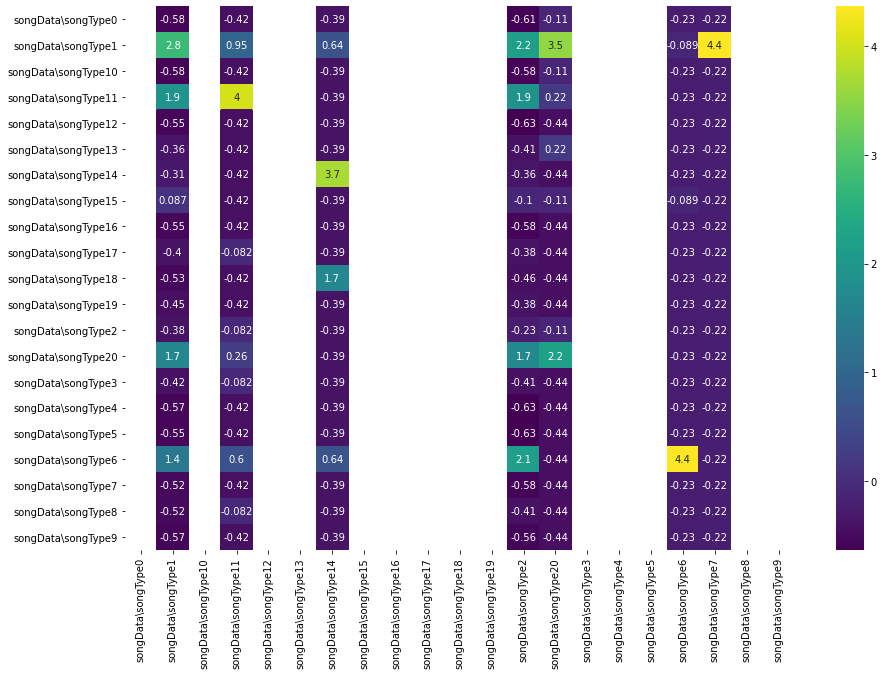

In [131]:

import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
array = confusion_matrix
df_cm = pd.DataFrame(array, index = [i for i in names],
              columns = [i for i in names])
df_norm_col=(df_cm-df_cm.mean())/df_cm.std()
#df_norm_col=df_cm-df_cm.mean()
plt.figure(figsize = (15,10))
sn.heatmap(df_norm_col, annot=True,cmap='viridis')